# Домашнее задание №3

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

In [2]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin. Построить график. Строим прямую с помощью уравнения которое мы посчитали. Предсказать несколько элементов из таблицы с помощью метода predict() и сравнить с результатом табличным.

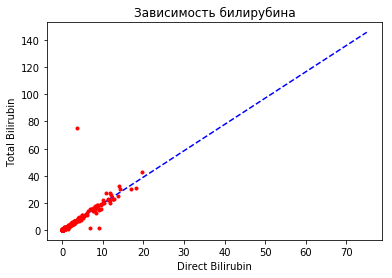

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

direct_Bilirubin, total_Bilirubin = data.Direct_Bilirubin, data.Total_Bilirubin
model.fit(np.array(direct_Bilirubin).reshape(-1,1), total_Bilirubin)

plt.xlabel('Direct Bilirubin')
plt.ylabel('Total Bilirubin')
plt.title('Зависимость билирубина')
x = np.linspace(min(direct_Bilirubin), max(total_Bilirubin), 2)
y = model.coef_ * x + model.intercept_
plt.plot(x, y, 'b--')
plt.plot(direct_Bilirubin, total_Bilirubin, 'r.')
plt.show()

In [4]:
idx = [1, 5, 40, 64, 100]
db = direct_Bilirubin[idx]
real_tb = total_Bilirubin[idx]
model_tb = model.predict(np.array(db).reshape(-1,1))

pd.DataFrame({"Direct Bilirubin" : db, "Total bilirubin (real)" : real_tb, "Total bilirubin (model)" : model_tb})


,Direct Bilirubin,Total bilirubin (real),Total bilirubin (model)
1,5.5,10.9,11.060704
5,0.7,1.8,1.778659
40,1.1,2.4,2.552162
64,0.4,1.3,1.198531
100,0.2,0.6,0.811779


Построить многомерную линейную регрессию для предсказания болезни (Dataset) от двух параметров. Параметры подобрать с помощью матрицы корреляций. Предсказать несколько значений из таблицы и сравнить результат модели от табличного значения.

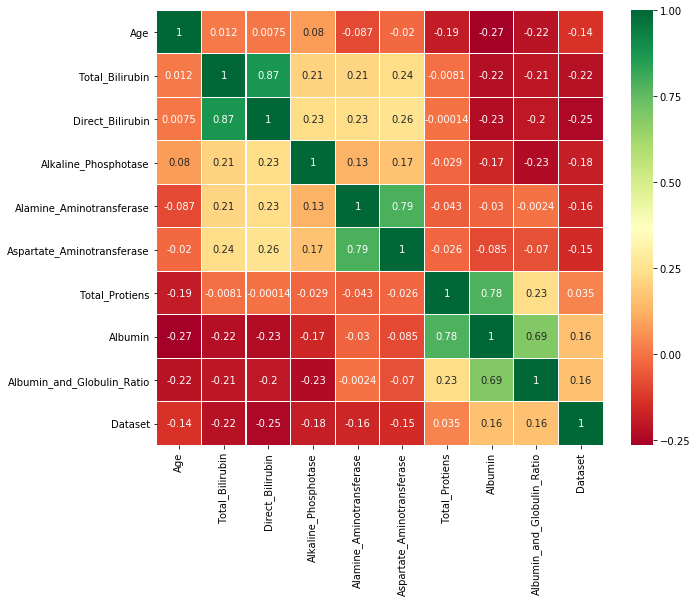

In [5]:
sns.heatmap(data.corr(), annot = True, cmap='RdYlGn', linewidths=0.1)
plt.gcf().set_size_inches(10,8)
plt.show()

In [6]:
# построим многомерную линейную регрессию параметра Dataset от параметров Direct_Bilirubin и Albumin
direct_Bilirubin = data.Direct_Bilirubin
albumin = data.Albumin
dataset = data.Dataset

X = np.vstack([np.array(direct_Bilirubin), np.array(albumin)]).T
y = np.array(dataset)

model = LinearRegression().fit(X, y)

In [7]:
idx = [0, 12, 33, 480, 580]
db = direct_Bilirubin[idx]
al = albumin[idx]
real_ds = dataset[idx]

# db,al
X = np.vstack([np.array(db), np.array(al)]).T
model_ds = model.predict(X)
X, model_ds, real_ds

pd.DataFrame({"Direct Bilirubin" : db, "Albumin" : al, "Dataset (real)" : real_ds, "Dataset (model)" : model_ds})

,Direct Bilirubin,Albumin,Dataset (real),Dataset (model)
0,0.1,3.3,1,1.345715
12,0.3,3.4,2,1.344915
33,1.2,3.0,2,1.287670
480,0.1,4.2,2,1.402514
580,0.2,3.2,1,1.335848


Посчитать квартили для всех колонок. 

In [8]:
quantiles = [(0.5, 'Q2'), (0.25, 'Q1'), (0.75, 'Q3')]

pd.DataFrame(
    [data.quantile(q[0], axis = 0) for q in quantiles],
    index = [q[1] for q in quantiles]
    )

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Q2,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.93,1.0
Q1,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.70,1.0
Q3,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.10,2.0


Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

C:\Users\gvs\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\gvs\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\gvs\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\gvs\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


Text(0.5, 1.0, 'Здоровые и больные в разных возрастных группах')

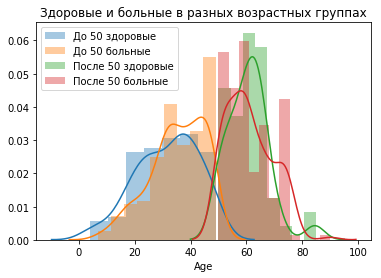

In [9]:
less_50 = data[data.Age < 50]
no_disease_less_50 = less_50[data.Dataset == 2]
liver_disease_less_50 = less_50[data.Dataset == 1]

after_50 = data[data.Age >= 50]
no_disease_after_50 = after_50[data.Dataset == 2]
liver_disease_after_50 = after_50[data.Dataset == 1]

sns.distplot(no_disease_less_50.Age)
sns.distplot(liver_disease_less_50.Age)
sns.distplot(no_disease_after_50.Age)
sns.distplot(liver_disease_after_50.Age)

plt.legend(["До 50 здоровые","До 50 больные", "После 50 здоровые","После 50 больные"])
plt.title("Здоровые и больные в разных возрастных группах")

In [10]:
groups = [(no_disease_less_50.Age, "До 50 здоровые"), (liver_disease_less_50.Age, "До 50 больные"),
    (no_disease_after_50.Age, "После 50 здоровые"), (liver_disease_after_50.Age, "После 50 больные")]
pd.DataFrame(
    data = [pd.Series([x[0].mean(), x[0].quantile()], index=["Среднее", "Q2"]) for x in groups],
    index = [x[1] for x in groups]
)

,Среднее,Q2
До 50 здоровые,31.651786,34.0
До 50 больные,35.356846,37.0
После 50 здоровые,60.763636,60.0
После 50 больные,61.022857,60.0


Видим что после 50 основной пик заболеваний приближается к 60.


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [11]:
tbi = data[data.Dataset==1]['Total_Bilirubin']
stats.ttest_1samp(tbi, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=2.471063305746647, pvalue=0.013871861207640042)

значение pvalue=0.014 меньше значения стандартной альфа ошибки (0.05) значит мы отвергаем нулевую гепотезу гласящую что нет различий в среднем значении критерия Total_Bilirubin генеральной совокупности и совокупности больных людей.

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [12]:
tbh = data[data.Dataset==2]['Total_Bilirubin']
stats.ttest_ind(tbi, tbh)

Ttest_indResult(statistic=5.441441126834863, pvalue=7.801430929364345e-08)

Значение pvalue значительно стандартной альфа что говорит о том что группы больных и здоровых различаются по показателю Total_Bilirubin

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [13]:
gr1 = data[data.Age < 30].Total_Bilirubin
gr2 = data[(data.Age >= 30) & (data.Age < 55)].Total_Bilirubin
gr3 = data[data.Age >= 55].Total_Bilirubin

stats.f_oneway(gr1, gr2, gr3)

F_onewayResult(statistic=1.9358927130115473, pvalue=0.14522662764594652)

pvalue нам говорит что группы не сильно отличаются, посмотрим же средние и медианные значения этих групп 

In [14]:
groups = [(gr1, "age < 30"), (gr2, "30 <= age < 55"), (gr3, "age >= 55")]
pd.DataFrame(
    data = [pd.Series([x[0].mean(), x[0].quantile()], index=["Среднее", "Медиана"]) for x in groups],
    index = [x[1] for x in groups]
)

,Среднее,Медиана
age < 30,2.227619,0.90
30 <= age < 55,3.581788,1.05
age >= 55,3.452273,1.10


Видим что сильно отличаются первая и вторая группы, вторая и третья довольно похожи. Видимо схожесть второй и третьей групп повлияло на pvalue в ANOVA тесте.

Вопросы задавать на почту yustiks@gmail.com